1. Import library, find some interesting in dataset.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier   
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [48]:
dataframe=pd.read_csv("heart.csv")
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [49]:
##Some basic information about the dataset.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [50]:
data_dup=dataframe.duplicated().any()
data_dup

True

In [51]:
dataframe.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [52]:
#Check null values
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Vậy, dataset không chứa bất kì giá trị null cũng như đã được xóa duplicate, quá tuyệt vời!

2. Exploratory Data Analysis:

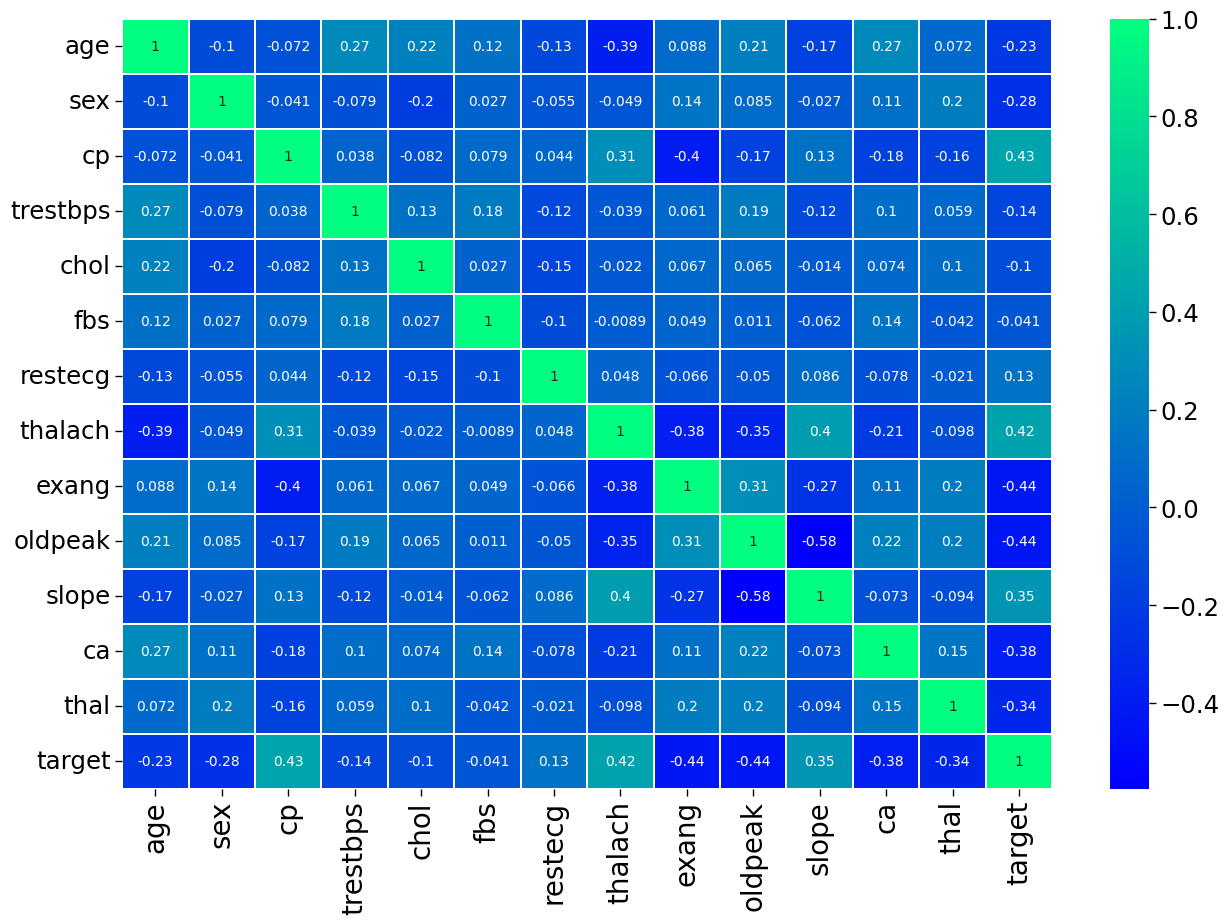

In [53]:
#Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=.01,annot=True,cmap="winter",annot_kws={"size": 10})
plt.show()

-   Dễ nhận thấy, Chest pain type có liên hệ mật thiết đến target nhất (0.43). Ngoài ra, thalach (0.42) và slope(0.35) cũng không kém cạnh.
-   Exang, oldpeak và ca, thal có tương quan âm với target(-0.44, -0.44, -0.38, -0.34). Nói về exang, tương quan âm với target nghia là khi tập thể dục mà bị đau thắt ngực, thường là do bị lượng máu dồn lên tim không đủ, thì tỷ lệ bị bệnh tim là không cao.

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

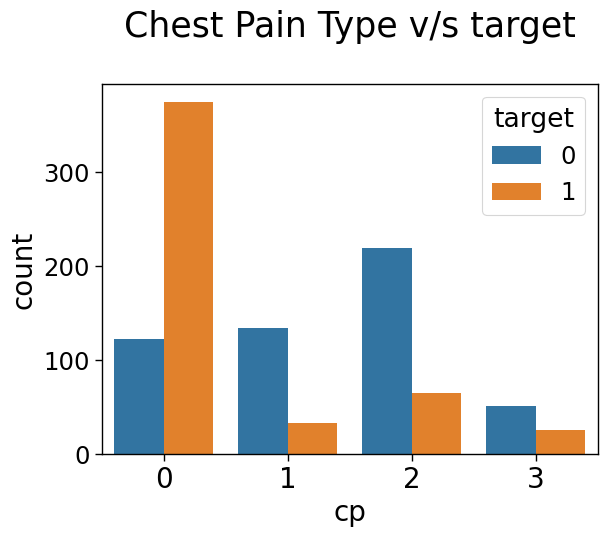

In [54]:
dataframe['target'] = dataframe['target'].replace({0: 1, 1: 0})
sns.countplot(data= dataframe, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Vậy, người khám có triệu chứng cơn đau thắt ngực rõ ràng, tỉ lệ cao người này bị bệnh tim.

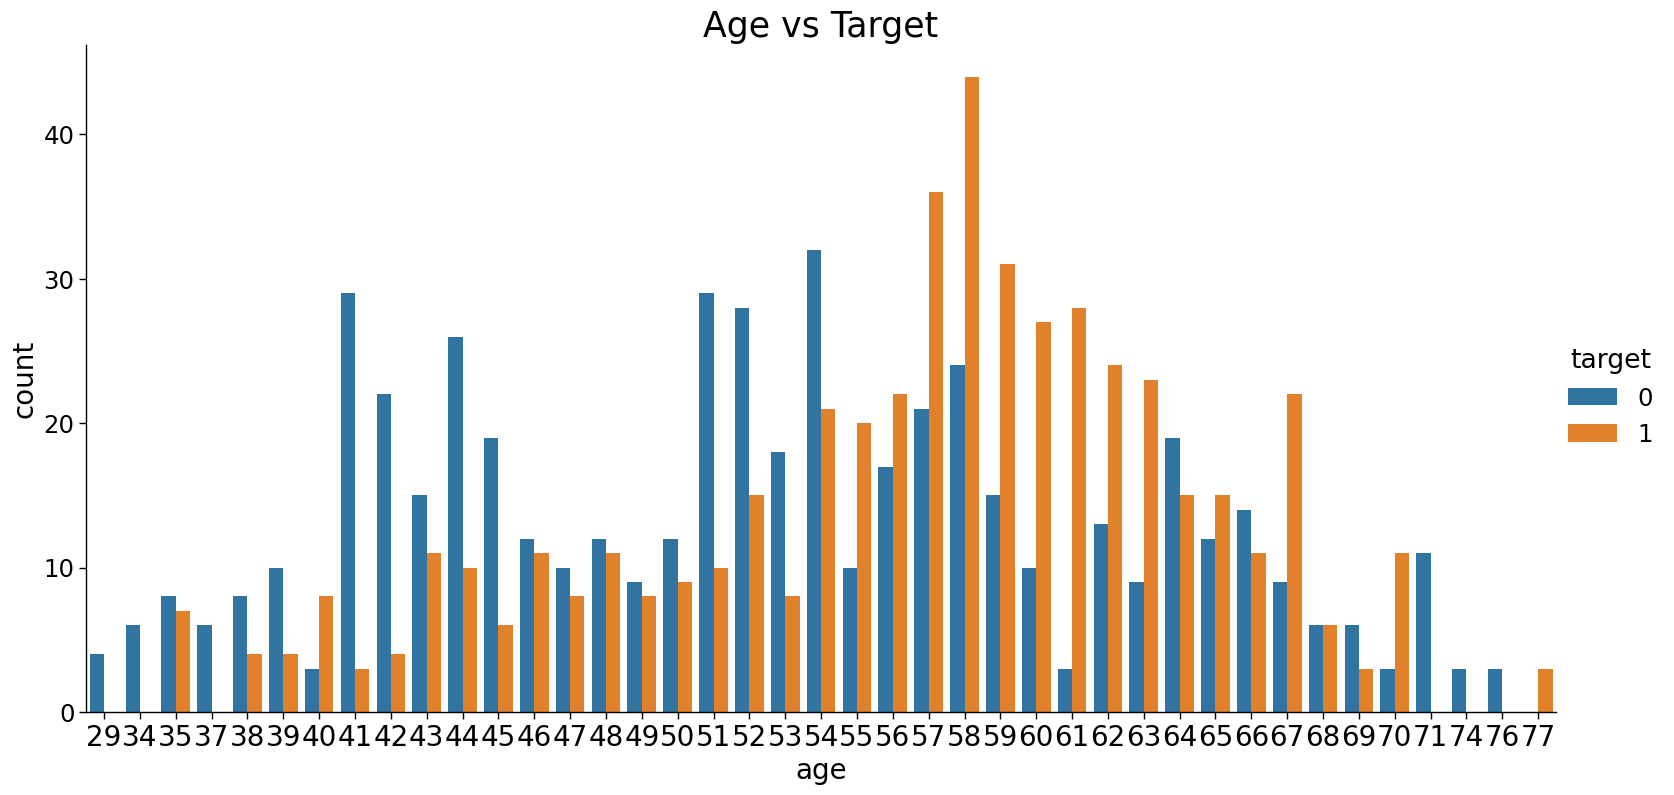

In [55]:
# Adjust context settings
sns.set_context("paper", font_scale=2, rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20, "xtick.labelsize": 20})

# Create the catplot with increased figure size
sns.catplot(kind='count', data=dataframe, x='age', hue='target', order=dataframe['age'].sort_values().unique(), height=8, aspect=2)

# Set the title
plt.title('Age vs Target')

# Show the plot
plt.show()


Các độ tuổi dễ mắc bệnh là khoảng từ 56-63.

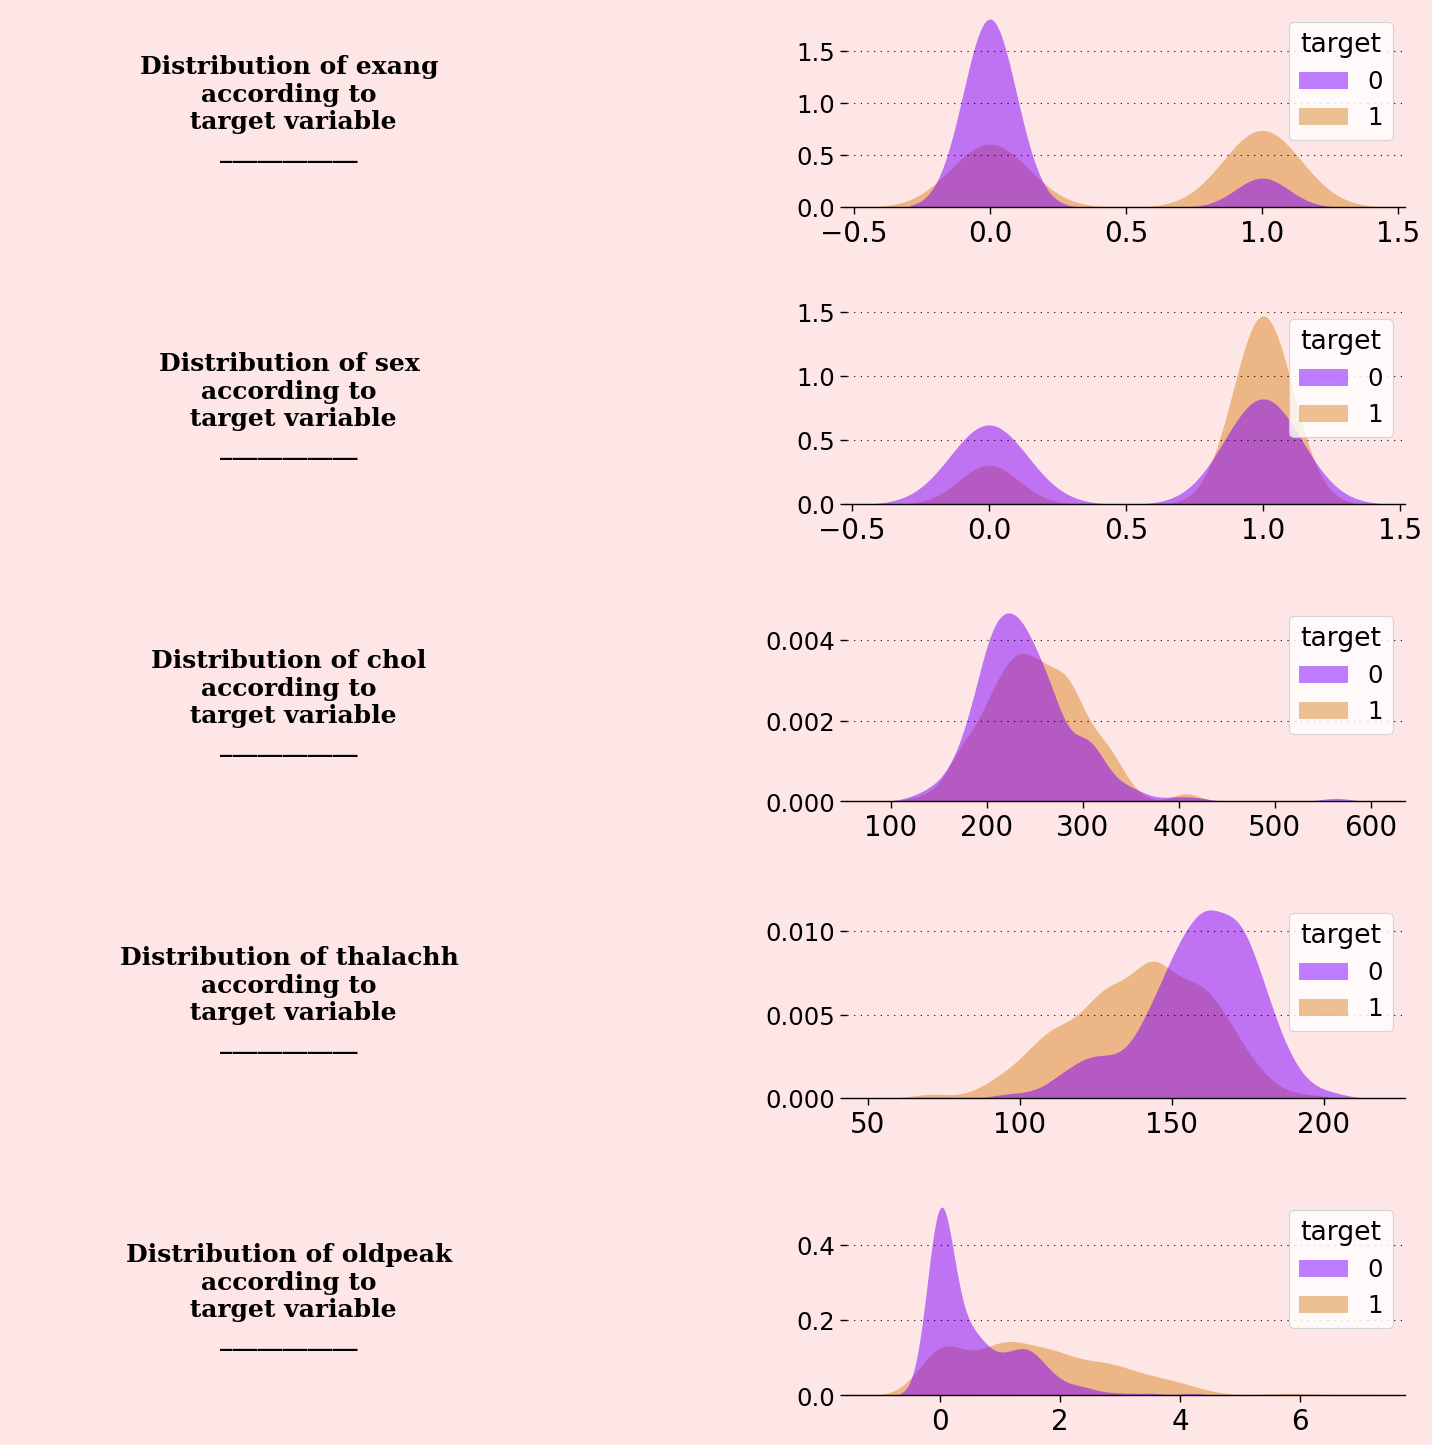

In [56]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of exang\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=dataframe , x='exang',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of sex\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=dataframe , x='sex',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=dataframe , x='chol',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=dataframe , x='thalach',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=dataframe , x='oldpeak',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")



for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

2. Chia dataset thành tập train và test:

In [57]:
x = dataframe.iloc[:, :-2]
y = dataframe.iloc[:, -1]
print('X:',y)


X: 0       1
1       1
2       1
3       1
4       1
       ..
1020    0
1021    1
1022    1
1023    0
1024    1
Name: target, Length: 1025, dtype: int64


In [58]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)  

(820, 12) (820,) (205, 12) (205,)


3. Preprocess:

In [59]:
#Chuẩn hóa
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

4.1. Decision tree:


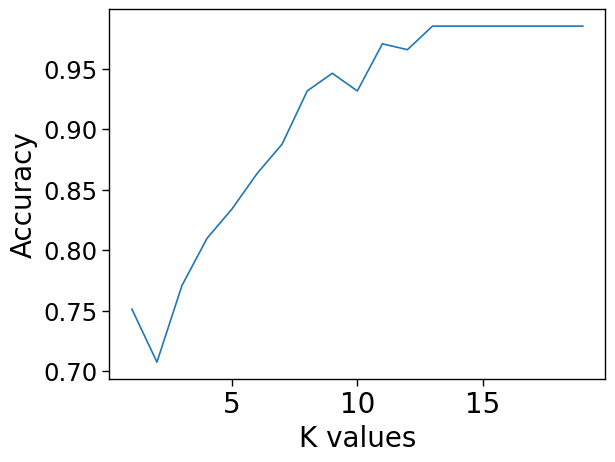

In [60]:
score_list = []
for each in range(1,20):
    test_model = DecisionTreeClassifier(criterion='entropy',max_depth=each)
    test_model.fit(x_train,y_train)
    score_list.append(test_model.score(x_test,y_test))
    
plt.plot(range(1,20),score_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()

Testing Accuracy for Decision Tree: 0.9658536585365853
Testing Sensitivity for Decision Tree: 0.9705882352941176
Testing Specificity for Decision Tree: 0.9611650485436893
Testing Precision for Decision Tree: 0.9611650485436893


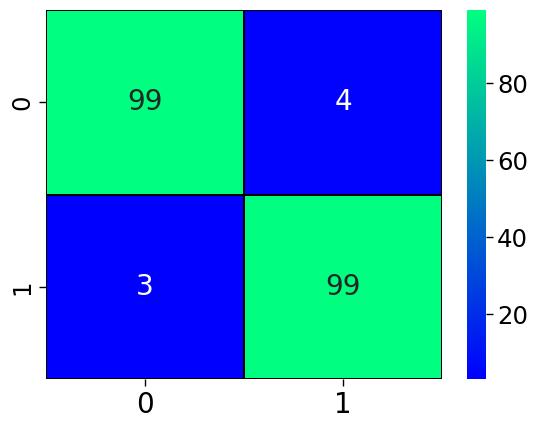

In [61]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=12)
cv_scores = cross_val_score(dt, x, y, cv=10, scoring='accuracy')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
cm= confusion_matrix(y_test,y_pred)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))


In [62]:
y_train_pred = dt.predict(x_train)

# Tính confusion matrix trên tập huấn luyện
cm = confusion_matrix(y_train, y_train_pred)
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Training Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Training Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Training Specificity for Decision Tree:',(TN/(TN+FP)))
print('Training Precision for Decision Tree:',(TP/(TP+FP)))

Training Accuracy for Decision Tree: 0.9926829268292683
Training Sensitivity for Decision Tree: 0.9976133651551312
Training Specificity for Decision Tree: 0.9875311720698254
Training Precision for Decision Tree: 0.9881796690307328


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       103
           1       0.96      0.97      0.97       102

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



4.2. K-nearest neighbor: 

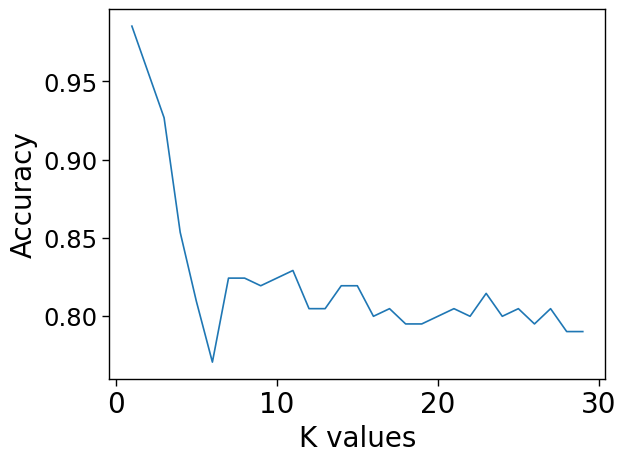

In [64]:
score_list = []
for each in range(1,30):
    test_model = KNeighborsClassifier(n_neighbors = each)
    test_model.fit(x_train,y_train)
    score_list.append(test_model.score(x_test,y_test))
    
plt.plot(range(1,30),score_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()

Testing Accuracy for KNN: 0.926829268292683
Testing Sensitivity for KNN: 0.94
Testing Specificity for KNN: 0.9142857142857143
Testing Precision for KNN: 0.912621359223301


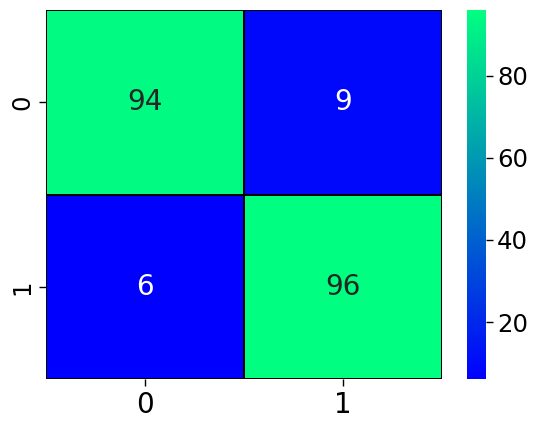

In [65]:
knn=KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'euclidean')
cv_scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
cm= confusion_matrix(y_test,y_pred)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for KNN:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for KNN:',(TP/(TP+FN)))
print('Testing Specificity for KNN:',(TN/(TN+FP)))
print('Testing Precision for KNN:',(TP/(TP+FP)))

In [66]:
y_train_pred = knn.predict(x_train)

# Tính confusion matrix trên tập huấn luyện
cm = confusion_matrix(y_train, y_train_pred)
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Trainingg Accuracy for KNN:',(TP+TN)/(TP+TN+FN+FP))
print('Training Sensitivity for KNN:',(TP/(TP+FN)))
print('Training Specificity for KNN:',(TN/(TN+FP)))
print('Training Precision for KNN:',(TP/(TP+FP)))

Trainingg Accuracy for KNN: 0.9939024390243902
Training Sensitivity for KNN: 0.995260663507109
Training Specificity for KNN: 0.992462311557789
Training Precision for KNN: 0.9929078014184397


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       103
           1       0.91      0.94      0.93       102

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



4.3. SVM:

In [68]:
check = [0.01, 0.1, 1, 10, 100, 1000]
score_list = []
for each in check:
    test_model = SVC(kernel='linear', C=each)
    test_model.fit(x_train,y_train)
    score_list.append(test_model.score(x_test,y_test))
    
score_list 

[0.8,
 0.7902439024390244,
 0.7853658536585366,
 0.7853658536585366,
 0.7853658536585366,
 0.7853658536585366]

Testing Accuracy for SVM: 0.8
Testing Sensitivity for SVM: 0.75
Testing Specificity for SVM: 0.8765432098765432
Testing Precision for SVM: 0.9029126213592233


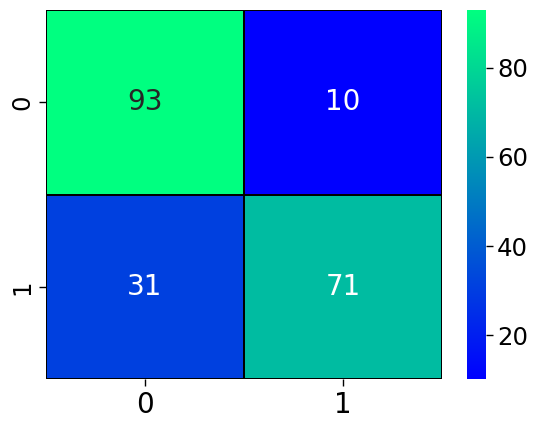

In [69]:
svc = SVC(kernel='linear', C=0.01)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
cm= confusion_matrix(y_test,y_pred)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for SVM:',(TP/(TP+FN)))
print('Testing Specificity for SVM:',(TN/(TN+FP)))
print('Testing Precision for SVM:',(TP/(TP+FP)))

In [70]:
y_train_pred = svc.predict(x_train)

# Tính confusion matrix trên tập huấn luyện
cm = confusion_matrix(y_train, y_train_pred)
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Training Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Training Sensitivity for SVM:',(TP/(TP+FN)))
print('Training Specificity for SVM:',(TN/(TN+FP)))
print('Training Precision for SVM:',(TP/(TP+FP)))

Training Accuracy for SVM: 0.8548780487804878
Training Sensitivity for SVM: 0.8127572016460906
Training Specificity for SVM: 0.9161676646706587
Training Precision for SVM: 0.933806146572104


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       103
           1       0.88      0.70      0.78       102

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



4.4. Logistic Regression:

In [72]:
check = [0.01, 0.1, 1, 10, 100, 1000]
score_list = []
for each in check:
    test_model = LogisticRegression(C=each, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
    test_model.fit(x_train,y_train)
    score_list.append(test_model.score(x_test,y_test))
    
score_list 

[0.8048780487804879,
 0.775609756097561,
 0.775609756097561,
 0.775609756097561,
 0.775609756097561,
 0.775609756097561]

Testing Accuracy for Logistic Regression: 0.8
Testing Sensitivity for Logistic Regression: 0.75
Testing Specificity for Logistic Regression: 0.8765432098765432
Testing Precision for Logistic Regression: 0.9029126213592233


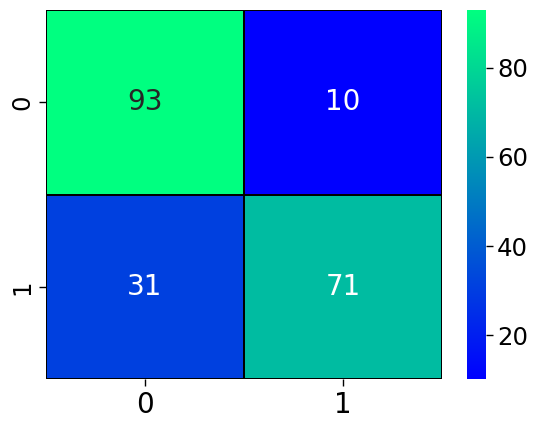

In [73]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(x_train,y_train)
prediction1=model1.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [74]:
y_train_pred = lr.predict(x_train)

# Tính confusion matrix trên tập huấn luyện
cm = confusion_matrix(y_train, y_train_pred)
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Training Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Training Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Training Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Training Precision for Logistic Regression:',(TP/(TP+FP)))

Training Accuracy for Logistic Regression: 0.8512195121951219
Training Sensitivity for Logistic Regression: 0.8293216630196937
Training Specificity for Logistic Regression: 0.8787878787878788
Training Precision for Logistic Regression: 0.8959810874704491


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       103
           1       0.88      0.70      0.78       102

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

